<a href="https://colab.research.google.com/github/MrA-png/Text-Mining-Search-Engine/blob/main/Text_Mining_%26_Search_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


Langkah 2 - Keywords (data1): ['harga', 'emas', 'batang', 'sertifikat', 'antam', 'keluar', 'logam', 'mulia', 'pt', 'aneka', 'tambang', 'tbk', 'antm', 'selasa', 'kutip', 'situs', 'logam', 'mulia', 'harga', 'pecah', 'gram', 'emas', 'antam', 'rp', 'harga', 'emas', 'antam', 'rp', 'harga', 'jumat', 'rp', 'harga', 'beli', 'buyback', 'emas', 'antam', 'turun', 'rp', 'rp', 'harga', 'emas', 'batang', 'antam', 'pecah', 'pajak', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'harga', 'emas', 'gram', 'rp', 'terang', 'logam', 'mulia', 'antam', 'jual', 'emas', 'perak', 'batang', 'ukur', 'berat', 'gram', 'gram', 'gram', 'harga', 'gram', 'emas', 'antam', 'beda', 'gantung', 'berat', 'batang', 'beda', 'biaya', 'tambah', 'cetak', 'harga', 'gram', 'emas', 'antam', 'batang', 'mah

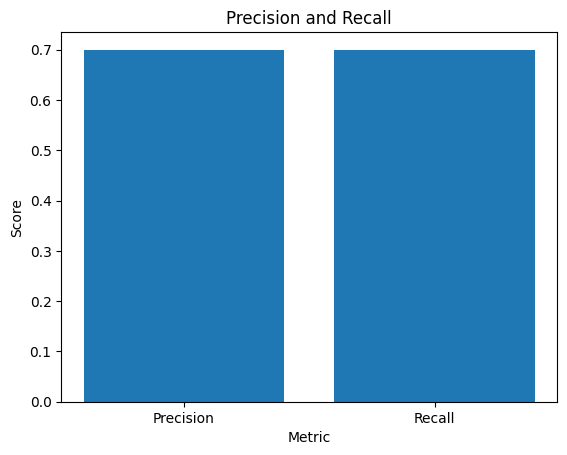

In [8]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan tokenisasi, filtering, dan stemming
# Langkah 2 - keywords
def preprocess(text):
    text = text.lower()  # Konversi ke lowercase
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca

    # Tokenizing
    tokens = nltk.word_tokenize(text)

    # Filtering stopwords
    stop_words = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    return stemmed_tokens

# Fungsi untuk menghitung TF dan menghapus keywords dengan score TF dibawah 50% dari score tertinggi
# Langkah 3 - scores
def calculate_scores(tokens):
    freq_dist = FreqDist(tokens)
    max_freq = max(freq_dist.values())
    threshold = max_freq * 0.5
    filtered_tokens = {word: freq for word, freq in freq_dist.items() if freq >= threshold}
    return filtered_tokens

# Membaca file data dan memprosesnya
# Langkah 1 - data
data_dir = "data_txt/"
all_scores = []

for i in range(1, 51):
    file_path = os.path.join(data_dir, f"data{i}.txt")
    with open(file_path, 'r', encoding='ISO-8859-1') as file:
        text = file.read()

        # Langkah 2: Preprocessing
        tokens = preprocess(text)
        print(f"Langkah 2 - Keywords (data{i}): {tokens}")

        # Langkah 3: Menghitung scores
        scores = calculate_scores(tokens)
        all_scores.append(scores)
        print(f"Langkah 3 - Scores (data{i}): {scores}")

# Langkah 4 - querylist
# Proses query "pertumbuhan ekonomi, perkembangan pasar dan pergerakan harga saham"
query = "pertumbuhan ekonomi, perkembangan pasar dan pergerakan harga saham"
query_tokens = preprocess(query)
print(f"Langkah 4 - Querylist: {query_tokens}")

# Langkah 5 - rankdocs
# Mencari 10 dokumen dengan skor tertinggi berdasarkan query
ranked_docs = []
for doc_scores in all_scores:
    score = sum(doc_scores.get(token, 0) for token in query_tokens)
    ranked_docs.append(score)

top_10_docs_indices = sorted(range(len(ranked_docs)), key=lambda i: ranked_docs[i], reverse=True)[:10]
top_10_docs = [all_scores[i] for i in top_10_docs_indices]
print(f"Langkah 5 - Rankdocs (Top 10 Dokumen): {top_10_docs_indices}")

# Langkah 6 - label
# Membaca file label
labels = pd.read_csv("label.csv")
print("Langkah 6 - Label:")
print(labels)

# Langkah 7 - recall dan precision
# Menghitung recall dan precision
relevant_docs = labels[labels['kategori'] == 'ekonomi'].index.tolist()
true_positives = sum(1 for doc in top_10_docs_indices if doc in relevant_docs)
precision = true_positives / len(top_10_docs)
recall = true_positives / len(relevant_docs)
print(f"Langkah 7 - Precision: {precision}")
print(f"Langkah 7 - Recall: {recall}")

# Langkah 8 - Visualisasi recall dan precision
plt.bar(['Precision', 'Recall'], [precision, recall])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.show()
